In [ ]:
##question 1)
##         A)
##question 2)
##         B)
##question 3)
##         D)

In [4]:
import pandas as pd 
interactions = pd.read_csv("customer_interactions.csv")
interactions.head()

,spend,interactions
0,5818,23
1,6255,15
2,6139,15
3,6070,19
4,4837,24


In [6]:
##computing the z-scores
interactions['Z_spend'] = (interactions['spend'] - interactions['spend'].mean()) / interactions['spend'].std()
interactions['Z_interactions'] = (interactions['interactions'] - interactions['interactions'].mean()) / interactions['interactions'].std()
interactions.head()

,spend,interactions,Z_spend,Z_interactions
0,5818,23,0.923351,0.647282
1,6255,15,1.145958,-0.809740
2,6139,15,1.086868,-0.809740
3,6070,19,1.051719,-0.081229
4,4837,24,0.423632,0.829410


In [21]:
from sklearn.cluster import KMeans

##defining the kmeans model
three_clusters = KMeans(n_clusters = 3, n_init = 20)

##applying kmeans to the data
iris_clusters = three_clusters.fit(interactions[['Z_spend', 'Z_interactions']])

##extracting the cluster labels
interactions['cluster'] = iris_clusters.labels_
interactions

,spend,interactions,Z_spend,Z_interactions,cluster
0,5818,23,0.923351,0.647282,0
1,6255,15,1.145958,-0.809740,2
2,6139,15,1.086868,-0.809740,2
3,6070,19,1.051719,-0.081229,2
4,4837,24,0.423632,0.829410,0
...,...,...,...,...,...
995,5117,27,0.566264,1.375794,0
996,5640,23,0.832678,0.647282,0
997,4766,23,0.387465,0.647282,0
998,1068,13,-1.496287,-1.173996,1


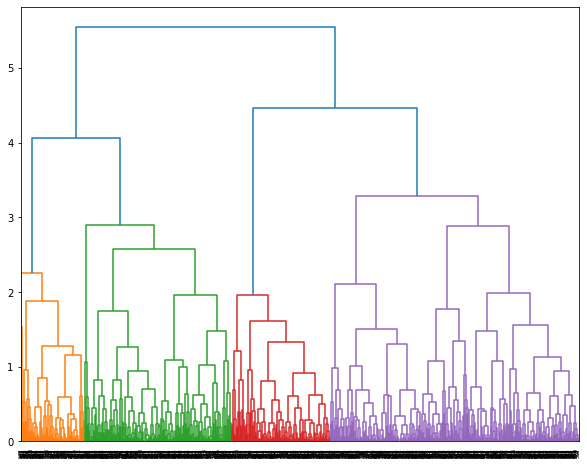

In [22]:
##Hirararchy 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10,8))
dend = shc.dendrogram(shc.linkage(interactions[['Z_spend', 'Z_interactions']], method = 'complete' ))
plt.show()